In [ ]:
%load_ext rpy2.ipython

# **Random Forest**

Les forêts aléatoires sont composées (comme le terme "forêt" l'indique) d'un ensemble d'arbres décisionnels. Ces arbres se distinguent les uns des autres par le sous-échantillon de données sur lequel ils sont entraînés. Ces sous-échantillons sont tirés au hasard (d'où le terme "aléatoire") dans le jeu de données initial.

In [ ]:
%%R
install.packages("caret")
install.packages("randomForest")
install.packages("plotly")
install.packages("partykit")
install.packages("party")


In [ ]:
%%R
# Chargement de la librairie
#library(randomForest)
#library(plotly)
#library(party)
#library(partykit)
#library(caret)

NULL


# 1)**Classification par forêts aléatoires**

Dans ce jeu de données, des iris de trois espèces différentes sont décrits par :

- leur appartenance à l'espèce setosa , versicolor , ou virginica.

- la longueur des sépales (les sortes de petites feuilles à la base des corolles de fleurs)

- la largeur des sépales

- la longueur des pétales

- la largeur des pétales

**Chargement des données**

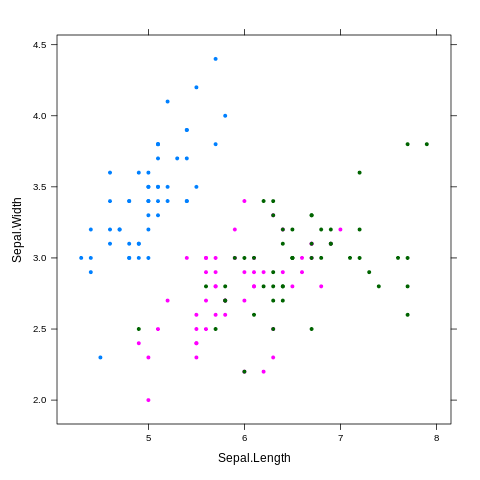

In [ ]:
%%R
# On utilise l'argument 'hue' pour fournir une variable de facteur
xyplot(Sepal.Width ~ Sepal.Length, iris, groups = iris$Species, pch= 20)

Nous avons ici une variable à prédire (Species) et 4 variables quantitatives qui vont nous permettre de calculer la probabilité que chaque fleur appartienne à une des espèces. Comme nous avons peu de variables

In [ ]:
%%R
#Chargement des données
data(iris)
head(iris,20)

   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1           5.1         3.5          1.4         0.2  setosa
2           4.9         3.0          1.4         0.2  setosa
3           4.7         3.2          1.3         0.2  setosa
4           4.6         3.1          1.5         0.2  setosa
5           5.0         3.6          1.4         0.2  setosa
6           5.4         3.9          1.7         0.4  setosa
7           4.6         3.4          1.4         0.3  setosa
8           5.0         3.4          1.5         0.2  setosa
9           4.4         2.9          1.4         0.2  setosa
10          4.9         3.1          1.5         0.1  setosa
11          5.4         3.7          1.5         0.2  setosa
12          4.8         3.4          1.6         0.2  setosa
13          4.8         3.0          1.4         0.1  setosa
14          4.3         3.0          1.1         0.1  setosa
15          5.8         4.0          1.2         0.2  setosa
16          5.7         

In [ ]:
%%R
#description des données 
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


Les jeux de données contiennent 150 observations et 5  variables. Species considérée comme variable de réponse. La variable Species doit être une variable de facteur

In [ ]:
%%R
#convertir les classes as factor
iris$Species=factor(iris$Species)
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
%%R
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 


**Partition de données**

Commençons par une graine aléatoire afin que le résultat soit reproductible et stocke les données d'entraînement et de test

In [ ]:
%%R
#Split iris data to Training data and testing data
ind <- sample(2,nrow(iris),replace=TRUE)
train <- iris[ind==1,]
test <- iris[ind==2,]
table(train$Species)



    setosa versicolor  virginica 
        28         24         28 


In [ ]:
%%R
head(train)

   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1           5.1         3.5          1.4         0.2  setosa
7           4.6         3.4          1.4         0.3  setosa
8           5.0         3.4          1.5         0.2  setosa
9           4.4         2.9          1.4         0.2  setosa
10          4.9         3.1          1.5         0.1  setosa
11          5.4         3.7          1.5         0.2  setosa


In [ ]:
%%R
table(test$Species)


    setosa versicolor  virginica 
        22         26         22 


In [ ]:
%%R
head(test)

   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
2           4.9         3.0          1.4         0.2  setosa
3           4.7         3.2          1.3         0.2  setosa
4           4.6         3.1          1.5         0.2  setosa
5           5.0         3.6          1.4         0.2  setosa
6           5.4         3.9          1.7         0.4  setosa
12          4.8         3.4          1.6         0.2  setosa


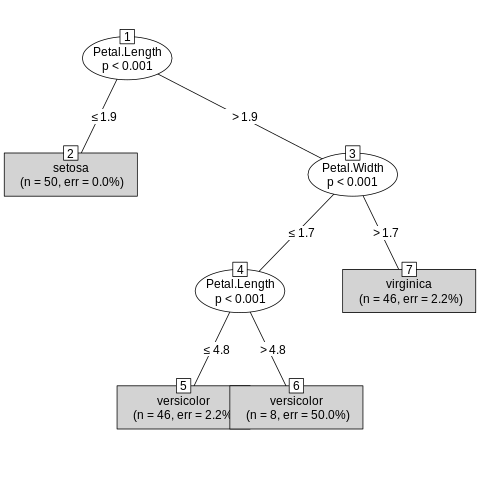

In [ ]:
%%R
#Try plotting how a decision tree for IRIS will look like
x <- ctree(Species~., data = iris)
plot(x, type = "simple")


**On applique l’algorithme Random Forest sur les données**

Plusieurs paramètres sont à définir et peuvent être ajustés pour optimiser l’algorithme :

– ntree : Le nombre d’arbres que la modèle va utiliser

– mtry : Le nombre de variables testées à chaque division d’un noeud , Random Forest tire aléatoirement les variables qu’il va utiliser pour chaque division d’un noeud

In [ ]:
%%R
#Train a RF model
#model <- randomForest(Species~.,data=iris, ntree = 500, mtry = 2, na.action = na.roughfix)
model <- randomForest(iris[,1:4], iris$Species)

**les résultats et la performance du modèle**

In [ ]:
%%R
#Print RF model details
print(model)


Call:
 randomForest(x = iris[, 1:4], y = iris$Species) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          4        46        0.08


Ici la fonction print nous permet d'afficher quelques caractéristiques de l'objet produit. On apprend ainsi que la forêt est composée de 500 arbres, qu'à chaque noeud l'algorithme fait un essai sur 2 variables, que le taux d'erreur est de 4.67%. La matrice de confusion est également affichée.

Par défaut, la fonction randomForest tire au hasard n individus parmi les n (avec remplacement, ce qui devrait correspondre, en moyenne, à l'échantillonnage au hasard de 63.2% des individus). Ainsi sur les n = 500 arbres, chaque individu fera partie de la fraction "in bag"  en moyenne 0.632 et "out of bag" en moyenne 0.368.


L’erreur Out Of Bag qui est utilisée pour mesurer la performance des modèles d’agrégation. Il s’agit de l’erreur moyenne calculée, à chaque fois, sur les échantillons qui n’ont pas servis à calculer le modèle.

La matrice de confusion qui permet d’avoir une vision plus détaillée de la performance du modèle. On peut lire en ligne les valeurs réelles et en colonne les valeurs prédites par l’algorithme. Ainsi, les valeurs sur la diagonale correspondent à de bonnes prédictions tandis que les autres valeurs ont mal été prédites. Ici, on voit par exemple que 4 Virginicas ont été prédites comme étant des Versicolors.

L'erreur de Out Of Bag est de 4,67%, de sorte que la précision du modèle de l'ensemble de données du train est d'environ 95.33 %

-  On peut ainsi accéder au nombre de fois où chaque individu est "out of bag" de la manière suivante ici on n'affiche que les dix premiers individus:

In [ ]:
%%R
print(model$oob.times[1:10])

 [1] 171 171 180 197 189 167 182 196 183 175


Sur l'ensemble des arbres sur lesquels les individus ont été "out of bag", on peut s'intéresser à la proportion de votes que chaque classe a recueilli. Ici, par exemple, on s'intéresse à un sous-échantillon de trois individus:

In [ ]:
%%R
sous_echant=c(25,75,135)
iris$Species[sous_echant]


[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica


In [ ]:
%%R
model$oob.times[sous_echant]

[1] 165 176 171


In [ ]:
%%R
model$votes[sous_echant,]

    setosa versicolor  virginica
25       1  0.0000000 0.00000000
75       0  0.9886364 0.01136364
135      0  0.4619883 0.53801170


Pour les trois individus affichés ci-dessus:

- la forêt aléatoire a classé le 1er individu en "setosa" (donc correctement) dans 100% des 165 arbres où il était "out of bag"

- la forêt aléatoire a classé le 2ème individu en "versicolor" (donc correctement) dans 98.8% des 176 arbres où il était "out of bag".

- la forêt aléatoire a classé le 3ème individu en "virginica" (donc correctement) dans seulement 46.1% des 171 arbres où il était "out of bag", et en versicolor dans les 53.8% de cas restants.

# **Prediction & Confusion Matrix – train data**

In [ ]:
%%R
p1 <- predict(model, train)
confusionMatrix(p1, train$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         28          0         0
  versicolor      0         24         0
  virginica       0          0        28

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9549, 1)
    No Information Rate : 0.35       
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                   1.00               1.0             1.00
Specificity                   1.00               1.0             1.00
Pos Pred Value                1.00               1.0             1.00
Neg Pred Value                1.00               1.0             1.00
Prevalence                    0.35            

La précision des données de train est de 100 %, ce qui indique toutes les valeurs correctement classées.

# **Matrice de prédiction et de confusion - données de test**

In [ ]:
%%R
p1 <- predict(model, test)
confusionMatrix(p1, test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         22          0         0
  versicolor      0         26         0
  virginica       0          0        22

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9487, 1)
    No Information Rate : 0.3714     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3143            

La précision des données de test est de 100 %

# **Taux d'erreur de la forêt aléatoire**

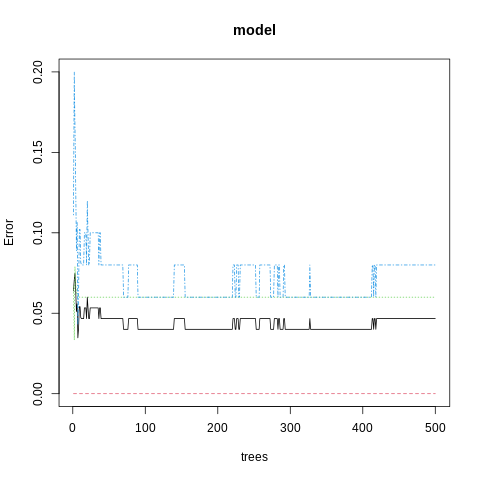

In [ ]:
%%R
#Plot error vs ntree for classes
plot(model)

Dans la construction de chacun des arbres il y a une part d'aléa liée à la fraction du jeu de donnée considérée pour l'entraînement de l'algorithme... Le taux d'erreur observé pour chaque arbre est donc aléatoire. Plus on construit d'arbres, et plus le taux d'erreur "moyen" va converger vers une valeur fixe (ici 4,67%).

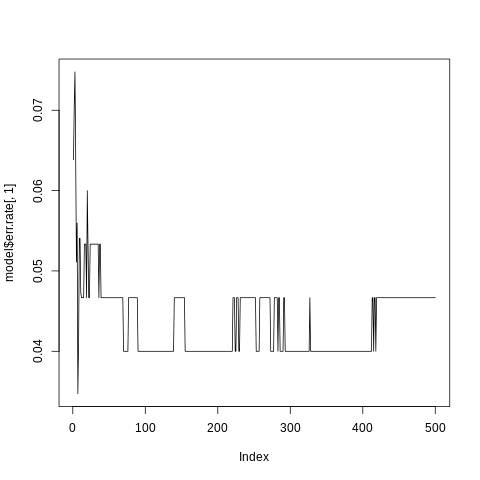

In [ ]:
%%R 
plot(model$err.rate[,1], type="l")

# 2)**RF Regression Example**

ici nous allons essayer de prédire la valeur des diamants à partir du jeu de données Diamonds en appliquant un régresseur de forêt aléatoire dans R. 

**Chargement et préparation des données**

In [ ]:
%%R
diamond <-diamonds
head(diamond)

# A tibble: 6 × 10
  carat cut       color clarity depth table price     x     y     z
  <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48


In [ ]:
%%R
#description des données 
summary(diamond)

     carat             cut            color          clarity     
 Min.   :0.2000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.4000   1st Qu.:3.000   1st Qu.:2.000   1st Qu.:3.000  
 Median :0.7000   Median :4.000   Median :4.000   Median :4.000  
 Mean   :0.7979   Mean   :3.904   Mean   :3.594   Mean   :4.051  
 3rd Qu.:1.0400   3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:5.000  
 Max.   :5.0100   Max.   :5.000   Max.   :7.000   Max.   :8.000  
     depth           table           price             x         
 Min.   :43.00   Min.   :43.00   Min.   :  326   Min.   : 0.000  
 1st Qu.:61.00   1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710  
 Median :61.80   Median :57.00   Median : 2401   Median : 5.700  
 Mean   :61.75   Mean   :57.46   Mean   : 3933   Mean   : 5.731  
 3rd Qu.:62.50   3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.: 6.540  
 Max.   :79.00   Max.   :95.00   Max.   :18823   Max.   :10.740  
       y                z         
 Min.   : 0.000   Min.   : 0.000  
 1st Q

In [ ]:
%%R
str(diamond)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : int [1:53940] 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : int [1:53940] 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: int [1:53940] 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


L'ensemble de données contient des informations sur 54 000 diamants. Il contient le prix ainsi que 9 autres attributs. Certaines fonctionnalités sont au format texte et nous devons les encoder au format numérique.

In [ ]:
%%R
#Convert the variables to numerical
diamond$cut <- as.integer(diamond$cut)
diamond$color <-as.integer(diamond$color)
diamond$clarity <- as.integer(diamond$clarity)

head(diamond)

# A tibble: 6 × 10
  carat   cut color clarity depth table price     x     y     z
  <dbl> <int> <int>   <int> <dbl> <dbl> <int> <dbl> <dbl> <dbl>
1  0.23     5     2       2  61.5    55   326  3.95  3.98  2.43
2  0.21     4     2       3  59.8    61   326  3.89  3.84  2.31
3  0.23     2     2       5  56.9    65   327  4.05  4.07  2.31
4  0.29     4     6       4  62.4    58   334  4.2   4.23  2.63
5  0.31     2     7       2  63.3    58   335  4.34  4.35  2.75
6  0.24     3     7       6  62.8    57   336  3.94  3.96  2.48


In [ ]:
%%R
# Create features and target
X <- diamond %>% 
  select(carat, depth, table, x, y, z, clarity, cut, color)
y <- diamond$price

**Entraîner le modèle et faire des prédictions**

À ce stade, nous devons diviser nos données en ensembles d'apprentissage et de test. En tant qu'ensemble d'apprentissage, nous prendrons 75 % de toutes les lignes et utiliserons 25 % comme données de test.

In [ ]:
%%R
# Split data into training and test sets
index <- createDataPartition(y, p=0.75, list=FALSE)
X_train <- X[ index, ]
X_test <- X[-index, ]
y_train <- y[index]
y_test<-y[-index]

In [ ]:
%%R
# Train the model 
regr <- randomForest(x = X_train, y = y_train , maxnodes = 10, ntree = 10)

Maintenant, nous avons un modèle pré-entraîné et pouvons prédire les valeurs des données de test. Nous comparons ensuite la valeur prédite avec les valeurs réelles dans les données de test et analysons la précision du modèle. Pour rendre cette comparaison plus illustrative, nous allons la montrer à la fois sous forme de tableau et tracer le prix et la valeur en carats

In [ ]:
%%R
# Make prediction
predictions <- predict(regr, X_test)

result <- X_test
result['price'] <- y_test
result['prediction']<-  predictions

head(result)

# A tibble: 6 × 11
  carat depth table     x     y     z clarity   cut color price prediction
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <int> <int> <int> <int>      <dbl>
1  0.31  63.3    58  4.34  4.35  2.75       2     2     7   335       706.
2  0.22  65.1    61  3.87  3.78  2.49       4     1     2   337       752.
3  0.23  59.4    61  4     4.05  2.39       5     3     5   338       706.
4  0.2   60.2    62  3.79  3.75  2.27       2     4     2   345       752.
5  0.31  59.4    62  4.39  4.43  2.62       3     3     7   353       706.
6  0.24  62.5    57  3.97  3.94  2.47       5     4     6   355       706.


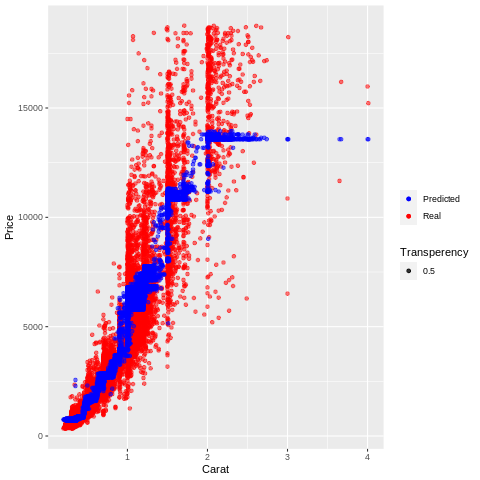

In [ ]:
%%R
# Import library for visualization
library(ggplot2)

# Build scatterplot
ggplot(  ) + 
  geom_point( aes(x = X_test$carat, y = y_test, color = 'red', alpha = 0.5) ) + 
  geom_point( aes(x = X_test$carat , y = predictions, color = 'blue',  alpha = 0.5)) + 
  labs(x = "Carat", y = "Price", color = "", alpha = 'Transperency') +
  scale_color_manual(labels = c( "Predicted", "Real"), values = c("blue", "red"))

La figure montre que les prix prédits (scatters bleus) coïncident bien avec les prix réels (scatters rouges), en particulier dans la région des petites valeurs en carats. Mais pour estimer notre modèle plus précisément, nous examinerons l'erreur absolue moyenne (MAE), l'erreur quadratique moyenne (MSE) et les scores R-carré.

In [ ]:
%%R
#Import library for Metrics
#install.packages('Metrics')
#library(Metrics)

NULL


In [ ]:
%%R
print(paste0('MAE: ' , mae(y_test,predictions) ))
print(paste0('MSE: ' ,caret::postResample(predictions , y_test)['RMSE']^2 ))
print(paste0('R2: ' ,caret::postResample(predictions , y_test)['Rsquared'] ))

[1] "MAE: 781.465696101673"
[1] "MSE: 1815189.13069214"
[1] "R2: 0.88720212416156"


Nous obtenons des valeurs d'erreur élevées (MAE et MSE). Pour améliorer le pouvoir prédictif du modèle, nous devons régler les hyperparamètres de l'algorithme. Nous pouvons le faire manuellement, mais cela prendra beaucoup de temps

Afin de régler les paramètres ntrees (nombre d'arbres dans la forêt) et maxnodes (nombre maximal de nœuds terminaux que les arbres de la forêt peuvent avoir), nous devrons créer un modèle de forêt aléatoire personnalisé pour obtenir le meilleur ensemble de paramètres pour notre modéliser et comparer la sortie pour diverses combinaisons de paramètres.

**Réglage des paramètres**

In [ ]:
%%R
# If training the model takes too long try setting up lower value of N
N=500 #length(X_train)
X_train_ = X_train[1:N , ]
y_train_ = y_train[1:N]

seed <-7
metric<-'RMSE'

customRF <- list(type = "Regression", library = "randomForest", loop = NULL)

customRF$parameters <- data.frame(parameter = c("maxnodes", "ntree"), class = rep("numeric", 2), label = c("maxnodes", "ntree"))

customRF$grid <- function(x, y, len = NULL, search = "grid") {}

customRF$fit <- function(x, y, wts, param, lev, last, weights, classProbs, ...) {
  randomForest(x, y, maxnodes = param$maxnodes, ntree=param$ntree, ...)
}

customRF$predict <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
   predict(modelFit, newdata)
customRF$prob <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
   predict(modelFit, newdata, type = "prob")
customRF$sort <- function(x) x[order(x[,1]),]
customRF$levels <- function(x) x$classes

In [ ]:
%%R
# Set grid search parameters
control <- trainControl(method="repeatedcv", number=10, repeats=3, search='grid')

# Outline the grid of parameters
tunegrid <- expand.grid(.maxnodes=c(70,80,90,100), .ntree=c(900, 1000, 1100))
set.seed(seed)

# Train the model
rf_gridsearch <- train(x=X_train_, y=y_train_, method=customRF, metric=metric, tuneGrid=tunegrid, trControl=control)

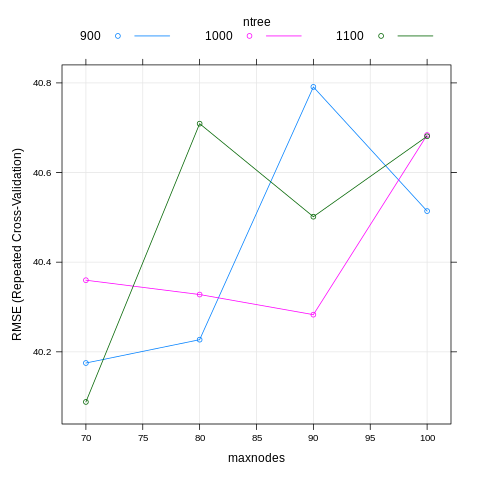

In [ ]:
%%R
plot(rf_gridsearch)

Visualisons l'impact des paramètres réglés sur le RMSE. Le graphique montre comment les performances du modèle évoluent avec différentes variations des paramètres. Pour les valeurs maxnodes : 70 et ntree : 1100, le modèle semble fonctionner le mieux. Nous utiliserons maintenant ces paramètres dans le modèle final.

Meilleurs paramètres :

In [ ]:
%%R
rf_gridsearch$bestTune

  maxnodes ntree
3       70  1100
